<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/vitaldb_python_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VitalDB Python Library
In this example, we will learn how to handle Vital files using `vitaldb` Python library.

## Preparation

### Install 'vitaldb' library
Intall `vitaldb` library in order to read Vital files.

In [24]:
#!pip install vitaldb
!pip install https://files.pythonhosted.org/packages/5f/65/790f3bb8def1184336023c635b5ad73e9cfa9eb2c323d1c663c78a0885ad/vitaldb-1.0.0-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached vitaldb-1.0.0-py3-none-any.whl (50 kB)


###Download sample vital files
Download sample vital files from the VitalDB website using the command below.

In [ ]:
!wget https://vitaldb.net/samples.zip
!unzip samples.zip

--2022-06-26 23:08:31--  https://vitaldb.net/samples.zip
Resolving vitaldb.net (vitaldb.net)... 15.197.255.47
Connecting to vitaldb.net (vitaldb.net)|15.197.255.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104335514 (100M) [application/zip]
Saving to: ‘samples.zip’

samples.zip         100%[===================>]  99.50M  20.5MB/s    in 6.1s    

2022-06-26 23:08:39 (16.4 MB/s) - ‘samples.zip’ saved [104335514/104335514]

Archive:  samples.zip
  inflating: 1-1.vital               
  inflating: 1-2.vital               
  inflating: 1.vital                 
  inflating: 2.vital                 
  inflating: 3.vital                 
  inflating: 4.vital                 


import `vitaldb` library to read vital file.

In [25]:
import vitaldb

## Vital File API
The Vital File API provides easy functions (`vital_trks`, `vital_recs`) and class (`VitalFile`) for reading a track list and contents from a vital file.

###Read the track list from a vital file
You can read the track list from a vital file using `vital_trks` function.

In [ ]:
trks = vitaldb.vital_trks('1.vital')
trks

['EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar8000/HR',
 'Solar8000/ST_I',
 'Solar8000/ST_II',
 'Solar8000/ST_III',
 'Solar8000/ST_AVL',
 'Solar8000/ST_AVR',
 'Solar8000/ST_AVF',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/ART_DBP',
 'Solar8000/PLETH_SPO2',
 'Solar8000/PLETH_HR',
 'Solar8000/BT',
 'Solar8000/VENT_MAWP',
 'Solar8000/ST_V5',
 'Solar8000/NIBP_MBP',
 'Solar8000/NIBP_SBP',
 'Solar8000/NIBP_DBP',
 'Solar8000/VENT_PIP',
 'Solar8000/VENT_RR',
 'Solar8000/VENT_MV',
 'Solar8000/VENT_TV',
 'Solar8000/VENT_PPLAT',
 'Solar8000/GAS2_AGENT',
 'Solar8000/GAS2_EXPIRED',
 'Solar8000/GAS2_INSPIRED',
 'Solar8000/ETCO2',
 'Solar8000/INCO2',
 'Solar8000/RR_CO2',
 'Solar8000/FEO2',
 'Solar8000/FIO2',
 'Solar8000/VENT_INSP_TM',
 'Solar8000/VENT_SET_TV',
 'Solar8000/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Primus/MAWP_MBAR',
 'Primus/MAC',
 'Primus/VENT_LEAK',
 'Primus/INCO2',

### Read the samples in a vital file
You can read the samples(values) in a vital file using `vital_recs` function. It returns the samples in a numpy array.

[[         nan          nan]
 [         nan          nan]
 [         nan          nan]
 ...
 [ -0.09797144 -20.65918   ]
 [ -0.06834793  32.663483  ]
 [  0.45500422  -4.8598633 ]]


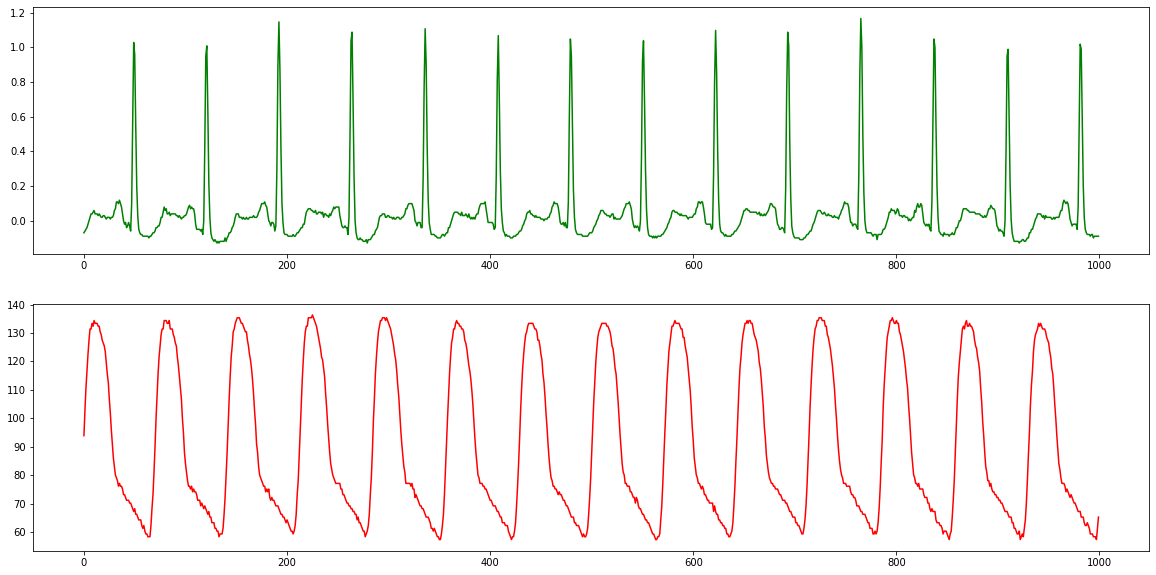

In [ ]:
vals = vitaldb.vital_recs('1.vital', ['ECG_II','ART'], 1/100)
print(vals)

ecg = vals[:,0]
art = vals[:,1]

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ecg[110000:111000], color='g')
plt.subplot(212)
plt.plot(art[110000:111000], color='r')
plt.show()

### Create VitalFile object
`VitalFile` class helps you read, write, and edit vital file easily and seamlessly. You can create `VitalFile` object by opening one or list of local or online vital file(s).

In [ ]:
vf = vitaldb.VitalFile('1.vital')
print(f'duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

duration 11542.097 seconds 79 tracks


You can even directly read the vital file online.

In [ ]:
vf = vitaldb.VitalFile('https://vitaldb.net/1.vital')
print(f'duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

duration 11542.097 seconds 79 tracks


The code below create `VitalFile` object by merging two vital files.

> Note: Only vital files within 2 days can be merged into one file.

In [ ]:
vf1 = vitaldb.VitalFile('1-1.vital')
print(f'1-1 duration {vf1.dtend - vf1.dtstart:.3f} seconds {len(vf1.trks)} tracks')

vf2 = vitaldb.VitalFile('1-2.vital')
print(f'1-2 duration {vf2.dtend - vf2.dtstart:.3f} seconds {len(vf2.trks)} tracks')

vf = vitaldb.VitalFile(['1-1.vital', '1-2.vital'])  # merged
print(f'merged duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

1-1 duration 3908.135 seconds 79 tracks
1-2 duration 6621.162 seconds 79 tracks
merged duration 11542.097 seconds 79 tracks


### Read information from the VitalFile object

All information such as track list and measured samples are in the `vf` object. For example, you can get a list of track names using the `vf.get_track_names()` method or `vf.trks.keys()`.

In [ ]:
vf.get_track_names()

['SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Primus/MAWP_MBAR',
 'Primus/MAC',
 'Primus/VENT_LEAK',
 'Primus/INCO2',
 'Primus/ETCO2',
 'Primus/FEO2',
 'Primus/FIO2',
 'Primus/FIN2O',
 'Primus/FEN2O',
 'Primus/SET_FIO2',
 'Primus/SET_FRESH_FLOW',
 'Primus/SET_AGE',
 'Primus/PIP_MBAR',
 'Primus/COMPLIANCE',
 'Primus/PPLAT_MBAR',
 'Primus/PEEP_MBAR',
 'Primus/TV',
 'Primus/MV',
 'Primus/RR_CO2',
 'Primus/SET_TV_L',
 'Primus/SET_INSP_TM',
 'Primus/SET_RR_IPPV',
 'Primus/SET_INTER_PEEP',
 'Primus/SET_PIP',
 'Primus/SET_INSP_PAUSE',
 'Primus/INSP_DES',
 'Primus/EXP_DES',
 'BIS/EEG1_WAV',
 'BIS/EEG2_WAV',
 'BIS/BIS',
 'BIS/SQI',
 'BIS/EMG',
 'BIS/SR',
 'BIS/SEF',
 'BIS/TOTPOW',
 'Solar8000/HR',
 'Solar8000/ST_I',
 'Solar8000/ST_II',
 'Solar8000/ST_III',
 'Solar8000/ST_AVL',
 'Solar8000/ST_AVR',
 'Solar8000/ST_AVF',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/ART_DBP

### Read samples from the VitalFile object
You can read the samples using `to_numpy()` method which will give you the same results with `vitaldb.vital_recs()`.

In [ ]:
vf.to_numpy(['ECG_II','ART'], 1/100)

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ -0.09797144, -20.65918   ],
       [ -0.06834793,  32.663483  ],
       [  0.45500422,  -4.8598633 ]], dtype=float32)

You can get the samples as a pandas DataFrame using `to_pandas()` method.

In [ ]:
df = vf.to_pandas(['ECG_II', 'ART'], 1/100, return_datetime=True)
df

,Time,ECG_II,ART
0,2100-01-01 00:00:00+00:00,NaN,NaN
1,2100-01-01 00:00:00.010000+00:00,NaN,NaN
2,2100-01-01 00:00:00.020000+00:00,NaN,NaN
3,2100-01-01 00:00:00.030000+00:00,NaN,NaN
4,2100-01-01 00:00:00.040000+00:00,NaN,NaN
...,...,...,...
1154205,2100-01-01 03:12:22.050000+00:00,-0.413958,5.014709
1154206,2100-01-01 03:12:22.060000+00:00,0.366133,4.027252
1154207,2100-01-01 03:12:22.070000+00:00,-0.097971,-20.65918
1154208,2100-01-01 03:12:22.080000+00:00,-0.068348,32.663483


### Edit VitalFile object
You can edit VitalFile object. For example, you can crop it, remove or rename tracks and devices.

In [ ]:
print(f'original duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')
vf.crop(vf.get_dt(2100, 1, 1, 1))  # remove samples before 2100 Jan 1, 1AM
vf.crop(60)  # remove samples within 60 sec from the beginning
print(f'cropped duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

vf.remove_tracks(['ECG_FIVE'])
print(f'track removed duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

vf.rename_tracks({'ECG_II': 'ECG_TWO', 'ECG_V5': 'ECG_FIVE'})
vf.rename_device('SNUADC', 'SUPER_NICE_ADC')

original duration 11542.097 seconds 79 tracks
cropped duration 7882.097 seconds 79 tracks
track removed duration 7882.097 seconds 79 tracks


### Save the VitalFile object to vital file
To save `VitalFile` object to vital file, call `to_vital()` with the file path to save.

In [ ]:
vf.to_vital('1_copyed.vital')

True

### Save the VitalFile object to csv file

In [ ]:
vf.to_csv('1.csv', ['ECG_II', 'ART'], 1/100, return_datetime=True)

import pandas as pd
pd.read_csv('1.csv')

,Time,ECG_II,ART
0,2100-01-01 00:01:00+00:00,NaN,NaN
1,2100-01-01 00:01:00.010000+00:00,NaN,NaN
2,2100-01-01 00:01:00.020000+00:00,NaN,NaN
3,2100-01-01 00:01:00.030000+00:00,NaN,NaN
4,2100-01-01 00:01:00.040000+00:00,NaN,NaN
...,...,...,...
1148205,2100-01-01 03:12:22.050000+00:00,-0.413958,5.014709
1148206,2100-01-01 03:12:22.060000+00:00,0.366133,4.027252
1148207,2100-01-01 03:12:22.070000+00:00,-0.097971,-20.659180
1148208,2100-01-01 03:12:22.080000+00:00,-0.068348,32.663483


### Batch extraction of specific tracks from multiple vital files
The code below explains how to extract tracks from several vital files in the specific folder and save them with csv file format.

In [ ]:
import os

TRACK_NAMES = ['ECG_II', 'ART']
for filename in os.listdir('.'):  # iterate files
    if filename.endswith('.vital'):
        print('converting:' + filename, end='...', flush=True)
        vf = vitaldb.VitalFile(filename, TRACK_NAMES)  # read vital file
        vf.to_csv(filename + '.csv.gz', TRACK_NAMES, 1/100)  # save as compressed csv
        print('done')

import pandas as pd
pd.read_csv('1.vital.csv.gz')

converting:1-1.vital...done
converting:2.vital...done
converting:3.vital...done
converting:1.vital...done
converting:1-2.vital...done
converting:4.vital...done
converting:1_copyed.vital...done


,ECG_II,ART
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1154205,-0.413958,5.014710
1154206,0.366133,4.027252
1154207,-0.097971,-20.659180
1154208,-0.068348,32.663483


## Platform API
You can login, list, and download vital files from the VitalDB platform using the `vitaldb` Platform API.

In [26]:
# path to save downloaded files
import os
DOWNLOAD_DIR = "download"
if not os.path.exists(DOWNLOAD_DIR):
    os.mkdir(DOWNLOAD_DIR)

if vitaldb.login(id="vitaldb_test", pw="vitaldb_test"):
    for file in vitaldb.filelist(None, '2021-10-01'):
        print("Downloading: " + file['filename'], end='...', flush=True)
        vitaldb.download(file['filename'], DOWNLOAD_DIR + '/' + file['filename'])
        print('done')
else:
    print('login error')

Downloading: TEST1_211020_142621.vital...done
Downloading: TEST2_211019_102621.vital...done
Downloading: TEST2_211020_101124.vital...done


You can read the vital file directly from the server by not specifing the file path to the `vitaldb.download` method.

In [27]:
vitaldb.login(id="vitaldb_test", pw="vitaldb_test")
filename = vitaldb.filelist()[0]['filename']
print(filename, end='...', flush=True)

# read the vital file directly from the server (no local file will be created)
vf = vitaldb.VitalFile(vitaldb.download(filename))
print(f'{len(vf.get_track_names())} tracks')

TEST1_211020_142621.vital...79 tracks


### Intranet server
For the intranet server, you can pass the host name and port number to the `vitaldb.login` method.

In [ ]:
# the code below will be executed only at SNUH
vitaldb.login(id='admin', pw='pass', host='snuh.vitaldb.net', port=80)

## Open Dataset API
VitalDB open dataset is the world largest intraoperative biosignal dataset that can be publicly accessible. You can use vitaldb open datasets with vitaldb python library.

### Find cases in the VitalDB open dataset

In [ ]:
caseids = vitaldb.find_cases(['ECG_II', 'ART'])
len(caseids)

3644

### Read an open dataset case


[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 ...
 [  0.148893 -32.5087  ]
 [ -0.325087  19.8266  ]
 [       nan        nan]]


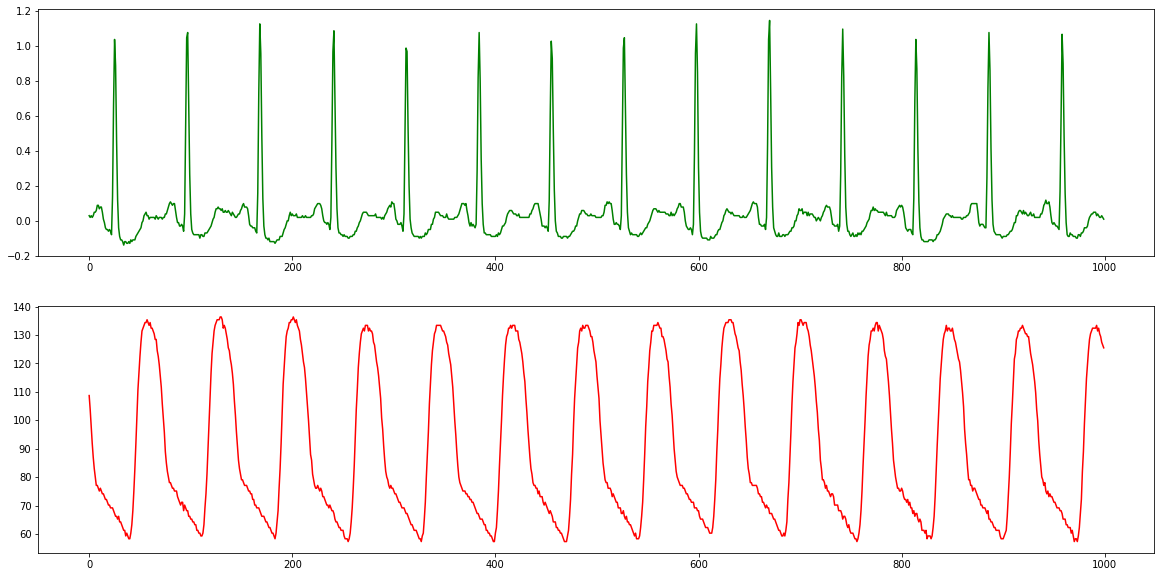

In [ ]:
vals = vitaldb.load_case(caseids[0], ['ECG_II','ART'], 1/100)
print(vals)

ecg = vals[:,0]
art = vals[:,1]

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ecg[110000:111000], color='g')
plt.subplot(212)
plt.plot(art[110000:111000], color='r')
plt.show()

Same as `load_case` in the functional API, you can download the tracks from the VitalDB open dataset.

In [ ]:
vf = vitaldb.VitalFile(1, ['ECG_II', 'ART'])  # load the first case from open dataset
print(f'{len(vf.get_track_names())} tracks')

2 tracks


With the code below, you can download the first 5 cases that have 'Primus/AWP' track in the open dataset.

In [ ]:
track_names = ['AWP']
for caseid in vitaldb.find_cases(track_names)[:5]:
    vf = vitaldb.VitalFile(caseid, track_names)
    vf.to_vital(f'awp{caseid}.vital')